In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load data
df = pd.read_excel('INF2178_A1_data.xlsx')



In [23]:
# Check for missing values:
df.isnull().sum()

OCCUPANCY_DATE                0
ORGANIZATION_NAME             0
PROGRAM_ID                    0
PROGRAM_NAME                 35
SECTOR                        0
PROGRAM_MODEL                 2
OVERNIGHT_SERVICE_TYPE        2
PROGRAM_AREA                  2
SERVICE_USER_COUNT            0
CAPACITY_TYPE                 0
CAPACITY_ACTUAL_BED       18545
OCCUPIED_BEDS             18545
CAPACITY_ACTUAL_ROOM      32399
OCCUPIED_ROOMS            32399
dtype: int64

In [24]:
# Dropping the missing values:
columns_to_check = ['PROGRAM_NAME', 'PROGRAM_MODEL', 'OVERNIGHT_SERVICE_TYPE', 'PROGRAM_AREA']
df_dropped = df.dropna(subset=columns_to_check)


In [5]:
# Check for duplicate rows:
df = df.drop_duplicates()

In [6]:
# Standardize and clean text data:
text_cols = ['ORGANIZATION_NAME', 'PROGRAM_NAME', 'SECTOR', 'PROGRAM_MODEL', 'OVERNIGHT_SERVICE_TYPE', 'PROGRAM_AREA', 'CAPACITY_TYPE']
for col in text_cols:
    df[col] = df[col].str.strip().str.lower()  # Adjusts string to lowercase and removes any leading/trailing whitespace


In [7]:
# Check for any unrealistic or incorrect values:
df = df[df['CAPACITY_ACTUAL_BED'] >= df['OCCUPIED_BEDS']]


In [18]:
# Check for outliers:
df.describe()

,PROGRAM_ID,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,50944.000000,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000
mean,13986.125844,45.727171,31.627149,29.780271,55.549259,52.798598
std,1705.288632,53.326049,27.127682,26.379416,59.448805,58.792954
min,11791.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,12233.000000,15.000000,15.000000,14.000000,19.000000,16.000000
50%,14251.000000,28.000000,25.000000,23.000000,35.000000,34.000000
75%,15651.000000,51.000000,43.000000,41.000000,68.000000,66.000000
max,16631.000000,339.000000,234.000000,234.000000,268.000000,268.000000


In [21]:
# count the total services number by the overight service type
overnight_service_type_counts = df.groupby('OVERNIGHT_SERVICE_TYPE')['SERVICE_USER_COUNT'].sum()
overnight_service_type_counts

OVERNIGHT_SERVICE_TYPE
24-Hour Respite Site        138022
24-Hour Women's Drop-in      11371
Interim Housing               3170
Isolation/Recovery Site      18066
Motel/Hotel Shelter        1086686
Shelter                    1067245
Warming Centre                4942
Name: SERVICE_USER_COUNT, dtype: int64

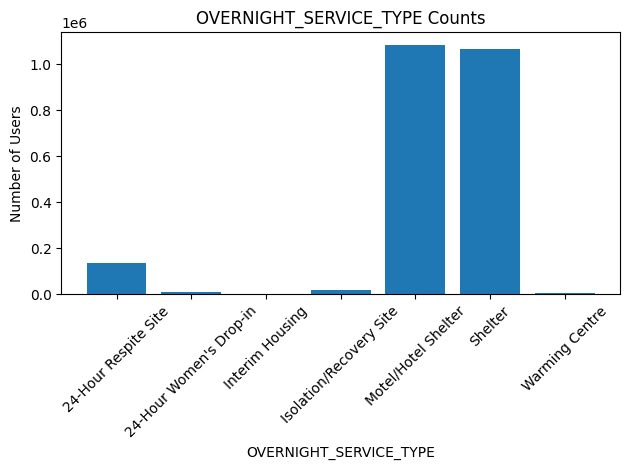

In [28]:
# plot the bar chart for overnight service type
x_data = overnight_service_type_counts.index.to_list()
y_data = overnight_service_type_counts.values.tolist()

plt.bar(x_data, y_data)
plt.xlabel("OVERNIGHT_SERVICE_TYPE")
plt.ylabel("Number of Users")
plt.title("OVERNIGHT_SERVICE_TYPE Counts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

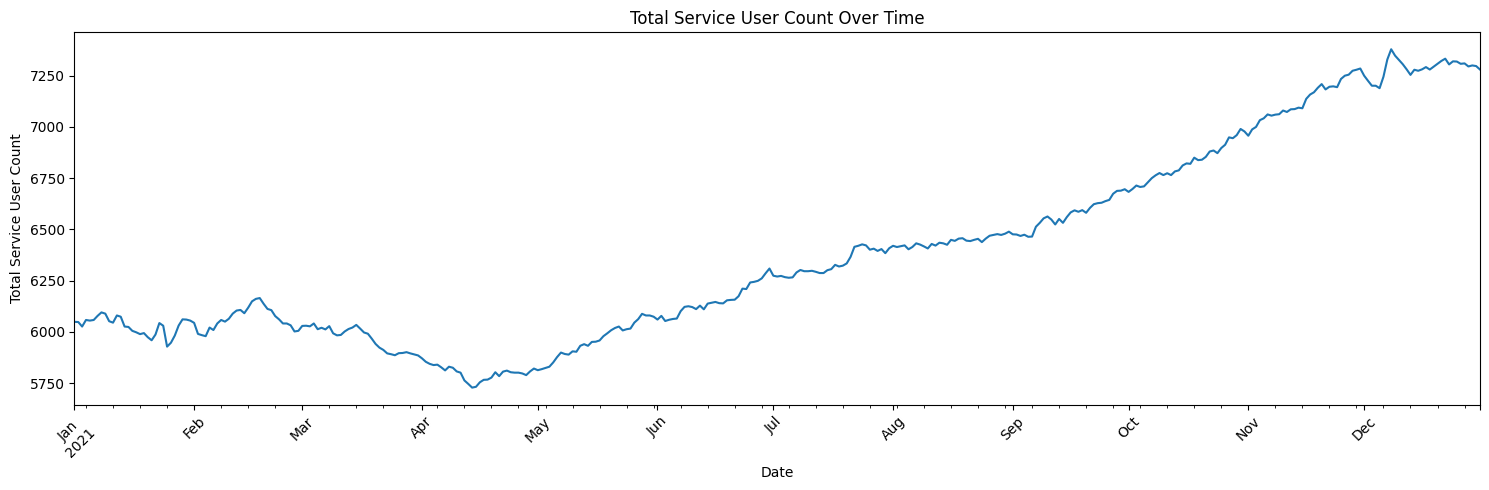

In [24]:
# Trend Analysis for Occupancy over time
plt.figure(figsize=(15, 5))
df.groupby('OCCUPANCY_DATE')['SERVICE_USER_COUNT'].sum().plot()
plt.title('Total Service User Count Over Time')
plt.xlabel('Date')
plt.ylabel('Total Service User Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-26-6e4e1aada8e2>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = df.groupby('OVERNIGHT_SERVICE_TYPE')['CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS'].sum().reset_index()


<Figure size 1000x600 with 0 Axes>

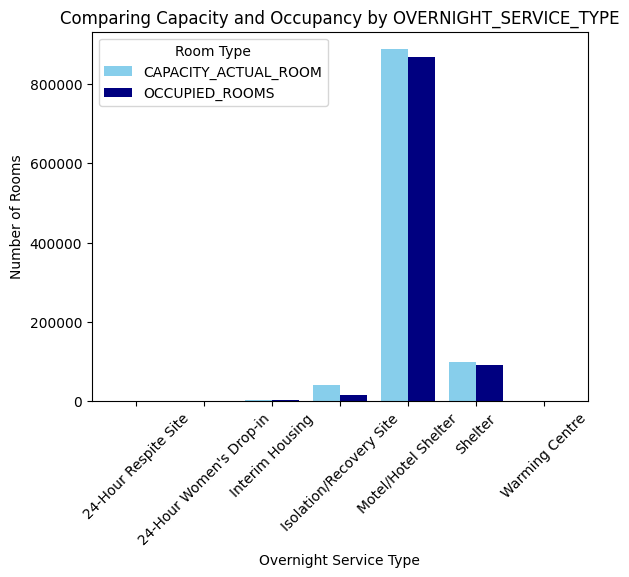

In [26]:
# Comparing Capacity and Occupancy by overnight service type
# Aggregate the data
grouped = df.groupby('OVERNIGHT_SERVICE_TYPE')['CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS'].sum().reset_index()

# Plot table
plt.figure(figsize=(10, 6))
ax = grouped.plot(x='OVERNIGHT_SERVICE_TYPE', kind='bar', width=0.8, color=['skyblue', 'navy'], edgecolor='none')
plt.title('Comparing Capacity and Occupancy by OVERNIGHT_SERVICE_TYPE')
plt.xlabel('Overnight Service Type')
plt.ylabel('Number of Rooms')
plt.xticks(rotation=45)
plt.legend(title='Room Type')

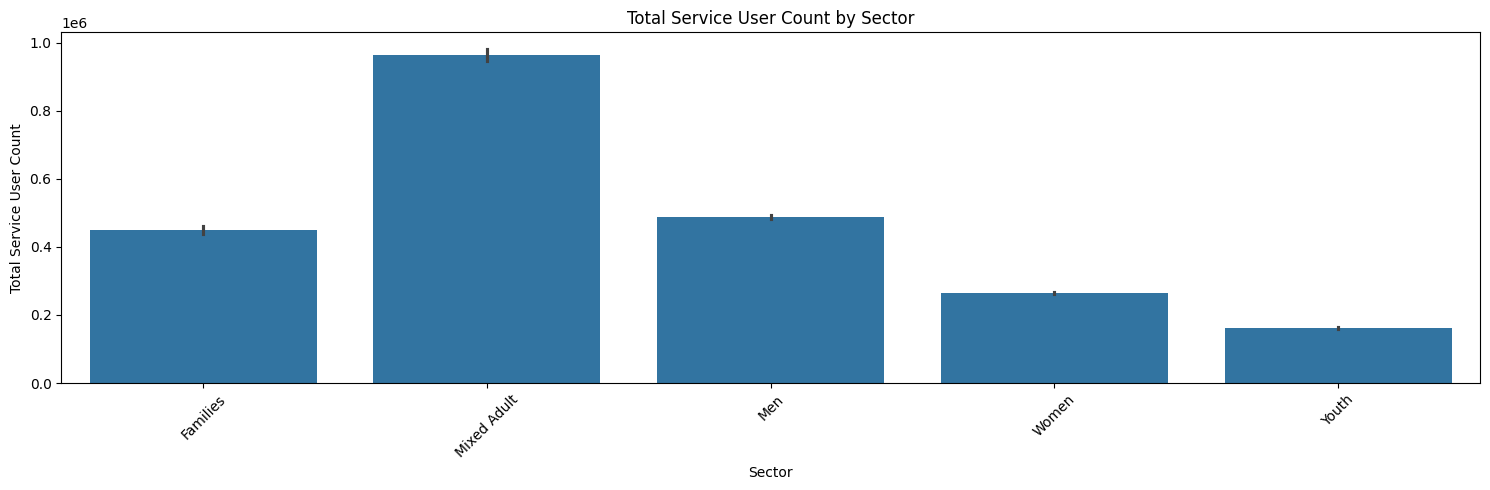

In [27]:
# Categorical Analysis - Average service user count by Sector
plt.figure(figsize=(15, 5))
sns.barplot(x='SECTOR', y='SERVICE_USER_COUNT', data=df, estimator=sum)
plt.title('Total Service User Count by Sector')
plt.xlabel('Sector')
plt.ylabel('Total Service User Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

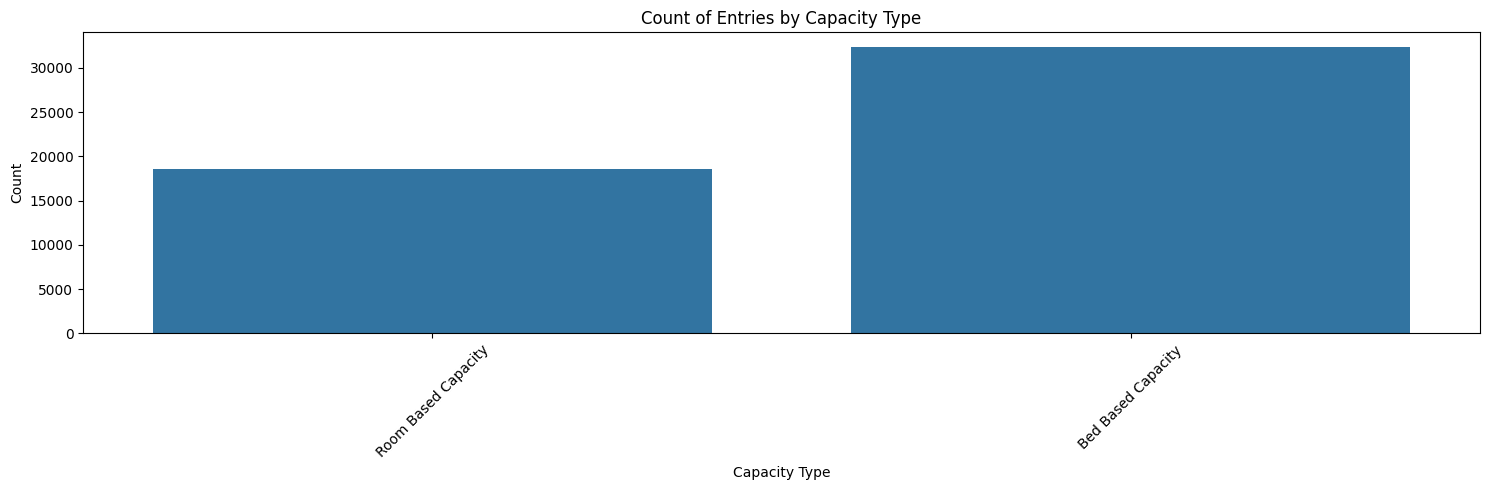

In [29]:
# Categorical Analysis - Utilization by Capacity Type
plt.figure(figsize=(15, 5))
sns.countplot(x='CAPACITY_TYPE', data=df)
plt.title('Count of Entries by Capacity Type')
plt.xlabel('Capacity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
import pandas as pd

# Filter the DataFrame to only include rows where CAPACITY_TYPE is not 'Bed Based Capacity'
new_df = df[df['CAPACITY_TYPE'] != 'Bed Based Capacity']

# Now 'new_df' contains only the rows with Room Based Capacity
new_df

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50920,2021-12-31,The Salvation Army of Canada,15491,SA Scarborough Hotel - Men's Program,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,128,Room Based Capacity,NaN,NaN,128.0,128.0
50923,2021-12-31,The Salvation Army of Canada,15871,Salvation Army New Hope Hotel Program,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,76,Room Based Capacity,NaN,NaN,76.0,76.0
50927,2021-12-31,Toronto Community Hostel,12274,Toronto Community Hostel (Families),Families,Emergency,Shelter,Base Shelter and Overnight Services System,10,Room Based Capacity,NaN,NaN,3.0,3.0
50932,2021-12-31,WoodGreen Red Door Family Shelter,11791,Red Door - Family Shelter,Families,Emergency,Shelter,Base Shelter and Overnight Services System,74,Room Based Capacity,NaN,NaN,23.0,22.0


In [32]:
# T-Test for occupancy rate of COVID-19 Response and Temporary Refugee Response
from scipy import stats

# Calculate OCCUPANCY_RATE and filter out zero capacity
new_df['OCCUPANCY_RATE'] = new_df.apply(
    lambda row: row['OCCUPIED_ROOMS'] / row['CAPACITY_ACTUAL_ROOM'] if row['CAPACITY_ACTUAL_ROOM'] > 0 else None,
    axis=1
)

# Drop NaN values from the 'OCCUPANCY_RATE' column to avoid errors in statistical tests
new_df = new_df.dropna(subset=['OCCUPANCY_RATE'])

# Define the two groups from the occupancy rate DataFrame.
group1 = new_df[new_df['PROGRAM_AREA'] == 'COVID-19 Response']['OCCUPANCY_RATE']
group2 = new_df[new_df['PROGRAM_AREA'] == 'Temporary Refugee Response']['OCCUPANCY_RATE']

# Ensure there's enough data in each group to perform the tests
if len(group1) > 1 and len(group2) > 1:
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False, nan_policy='omit')

    print('T-statistic:', t_stat)
    print('P-value:', p_value)
else:
    print("Not enough data to perform t-test.")

# Interpret the p-value
if p_value < 0.05:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")


T-statistic: -12.888287902869505
P-value: 1.1506752920082957e-35
There is a significant difference between the groups.


In [34]:
import pandas as pd
from scipy.stats import ttest_ind


# Calculate the occupancy rate by dividing 'OCCUPIED_ROOMS' by 'CAPACITY_ACTUAL_ROOM'
# Add a small number to avoid division by zero and remove rows with no capacity information
new_df['occupancy_rate'] = new_df['OCCUPIED_ROOMS'] / (new_df['CAPACITY_ACTUAL_ROOM'] + 1e-9)

# Now, filter the data for 'Families' and 'Mixed Adult' sectors within the room-based capacity DataFrame
family_occupancy_rates = new_df[(new_df['SECTOR'] == 'Families')]['occupancy_rate']
mixed_adult_occupancy_rates = new_df[(new_df['SECTOR'] == 'Mixed Adult')]['occupancy_rate']

# Perform the independent samples t-test, using Welch's t-test (which does not assume equal variances)
# Note that we assume 'nan_policy' to be 'omit' to automatically exclude NaNs from the analysis
t_stat, p_value = ttest_ind(family_occupancy_rates, mixed_adult_occupancy_rates, equal_var=False, nan_policy='omit')

# Output the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpret the p-value
if p_value < 0.05:
    print("There is a significant difference between the occupancy rates of Families and Mixed Adult sectors.")
else:
    print("There is no significant difference between the occupancy rates of Families and Mixed Adult sectors.")


T-statistic: 9.17540819994938
P-value: 5.3308380812517514e-20
There is a significant difference between the occupancy rates of Families and Mixed Adult sectors.


In [35]:
from scipy import stats


# Define groups based on different populations within the room-based capacity DataFrame
adult_male = new_df[new_df['SECTOR'] == 'Men']['OCCUPANCY_RATE']
adult_female = new_df[new_df['SECTOR'] == 'Women']['OCCUPANCY_RATE']
mixed_adult = new_df[new_df['SECTOR'] == 'Mixed Adult']['OCCUPANCY_RATE']

# Drop NaN values from the groups to avoid issues with the ANOVA test
adult_male = adult_male.dropna()
adult_female = adult_female.dropna()
mixed_adult = mixed_adult.dropna()

# Perform one-way ANOVA test to compare means of different groups
f_statistic, p_value = stats.f_oneway(adult_male, adult_female, mixed_adult)

print('F-statistic:', f_statistic)
print('p-value:', p_value)

# Determine if there are significant differences
alpha = 0.05
if p_value < alpha:
    print('There are significant differences between the population groups.')
else:
    print('There are no significant differences between the population groups.')


F-statistic: 283.54301265980627
p-value: 8.06844494298329e-121
There are significant differences between the population groups.


In [37]:
from scipy import stats

# Calculate OCCUPANCY_RATE and filter out zero capacity
new_df['OCCUPANCY_RATE'] = new_df.apply(
    lambda row: row['OCCUPIED_ROOMS'] / row['CAPACITY_ACTUAL_ROOM'] if row['CAPACITY_ACTUAL_ROOM'] > 0 else None,
    axis=1
)

# Drop NaN values from the 'OCCUPANCY_RATE' column to avoid errors in statistical tests
new_df = new_df.dropna(subset=['OCCUPANCY_RATE'])

# Define the groups from the occupancy rate DataFrame.
covid_response_group = new_df[new_df['PROGRAM_AREA'] == 'COVID-19 Response']['OCCUPANCY_RATE']
temporary_refugee_group = new_df[new_df['PROGRAM_AREA'] == 'Temporary Refugee Response']['OCCUPANCY_RATE']


# Perform a T-test
t_stat, p_value = stats.ttest_ind(covid_response_group, temporary_refugee_group, equal_var=False, nan_policy='omit')

print('T-statistic:', t_stat)
print('P-value:', p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the occupancy rates for COVID-19 Response and Temporary Refugee Response.")
else:
    print("There is no significant difference between the occupancy rates for COVID-19 Response and Temporary Refugee Response.")


T-statistic: -12.888287902869505
P-value: 1.1506752920082957e-35
There is a significant difference between the occupancy rates for COVID-19 Response and Temporary Refugee Response.


Pre-COVID mean occupancy rate: 0.92239881641994
During-COVID mean occupancy rate: 0.9355651315375937
T-statistic: -5.080082952855529, P-value: 3.869342138689027e-07
Significant difference in occupancy rates.


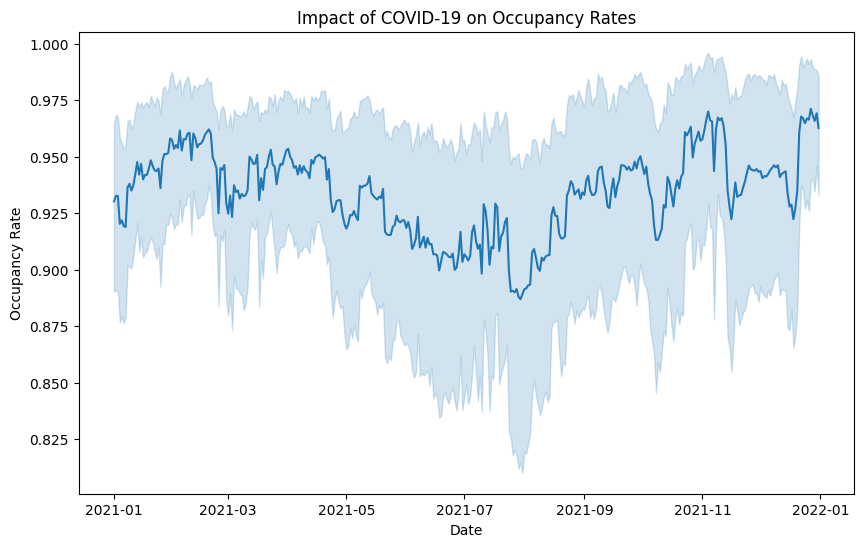

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Calculate summary statistics
pre_covid_occupancy = df[df['PROGRAM_AREA'] == 'Base Shelter and Overnight Services System']['OCCUPANCY_RATE']
during_covid_occupancy = df[df['PROGRAM_AREA'] == 'COVID-19 Response']['OCCUPANCY_RATE']

print(f"Pre-COVID mean occupancy rate: {pre_covid_occupancy.mean()}")
print(f"During-COVID mean occupancy rate: {during_covid_occupancy.mean()}")

# Perform a t-test
t_stat, p_value = ttest_ind(pre_covid_occupancy, during_covid_occupancy, equal_var=False, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Check if the difference is significant
if p_value < 0.05:
    print("Significant difference in occupancy rates.")
else:
    print("No significant difference in occupancy rates.")

# Create a line plot or bar chart to visualize the impact
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='OCCUPANCY_DATE', y='OCCUPANCY_RATE')
plt.title('Impact of COVID-19 on Occupancy Rates')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate')
plt.show()
